# BigMart Outletwise Product Sales Prediction

The data and the problem is available in the following link.https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#ProblemStatement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

Variable	Description
* Item_Identifier	Unique product ID
* Item_Weight	Weight of product
* Item_Fat_Content	Whether the product is low fat or not
* Item_Visibility	The % of total display area of all products in a store allocated to the particular product
* Item_Type	The category to which the product belongs
* Item_MRP	Maximum Retail Price (list price) of the product
* Outlet_Identifier	Unique store ID
* Outlet_Establishment_Year	The year in which store was established
* Outlet_Size	The size of the store in terms of ground area covered
* Outlet_Location_Type	The type of city in which the store is located
* Outlet_Type	Whether the outlet is just a grocery store or some sort of supermarket
* Item_Outlet_Sales	Sales of the product in the particular store. This is the outcome variable to be predicted.

# Loading the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns=100
pd.options.display.max_rows=100

## Loading the data

In [3]:
df_train=pd.read_csv('Train_data.csv')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Check the DataFrame shape
df_train.shape

(8523, 12)

* Train Dataframe contain 8523 columnsand 12 features

In [5]:
df_test=pd.read_csv('Test_data.csv')
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
# Check the DataFrame shape
df_test.shape

(5681, 11)

* Test Dataframe contain 5681 columnsand 12 features

In [7]:
print('Train Data Set:',df_train.shape)
print('Test Data Set:',df_test.shape)


Train Data Set: (8523, 12)
Test Data Set: (5681, 11)


## Combine the both train and test dataset

In [8]:
df=pd.concat([df_train,df_test],ignore_index=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


In [10]:
# Check the DataFrame shape
df.shape

(14204, 12)

In [11]:
# Will check for Duplicated Data
df[df.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [13]:
# checking the null values in data
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

* Item_weight ,Outlet_Size have the missing value and Item_Outlet_Sales also have null values but it is in test data

In [14]:
## Check the statistics summary of data
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800



1. **Item_Visibility** has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
2. The ‘count’ of Item_Weight and Item_Outlet_Sales confirms the presence  of missing value check.

In [15]:
df.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,14204,14204,14204,14204,10188,14204,14204
unique,1559,5,16,10,3,3,4
top,FDU15,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,8485,2013,1559,4655,5583,9294


 * By the categorical summary we see that count of each varibale ,unique values ,frequency of the variable

In [16]:
#categorical variable
df_cat=df.select_dtypes(include='O')
df_cat.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [17]:
## print the frequency of the each  categorical variable
for col in df_cat:
    print('The frequency of categorical variable:',col)
    print(df[col].value_counts())
    print(" ")

The frequency of categorical variable: Item_Identifier
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64
 
The frequency of categorical variable: Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
 
The frequency of categorical variable: Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
 
The frequency of categori


1. **Item_Fat_Content:** Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.
2. **Item_Type:** Not all categories have substantial numbers. It looks like combining them can give better results.

<BarContainer object of 14204 artists>

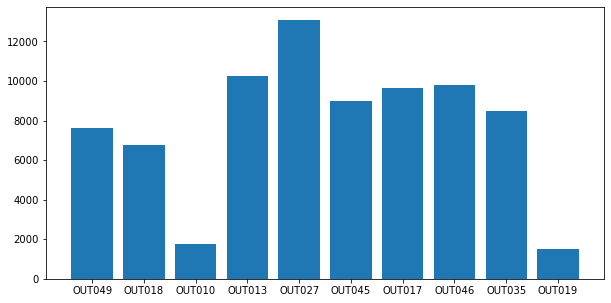

In [18]:
## Plot outlet type v/s outlet sales
plt.figure(figsize=(10,5))
plt.bar(df["Outlet_Identifier"],df["Item_Outlet_Sales"], width = 0.8)

<BarContainer object of 14204 artists>

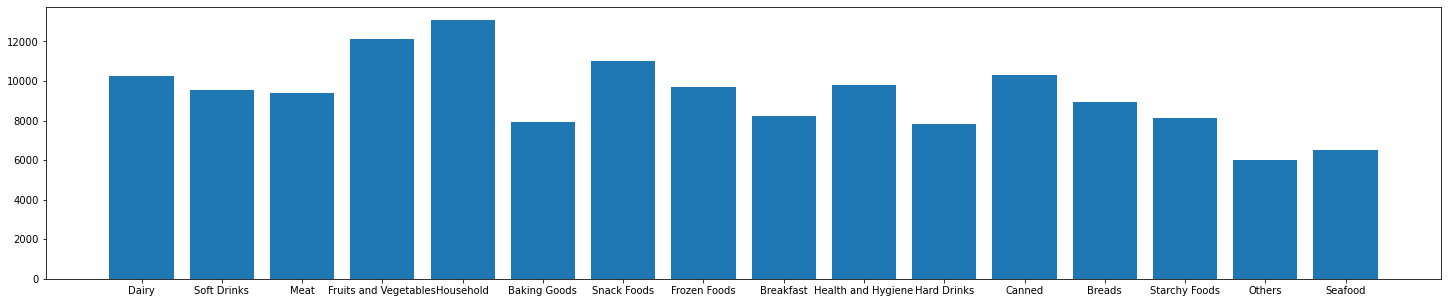

In [19]:
## Plot Item type v/s outlet sales
plt.figure(figsize=(25,5))
plt.bar(df["Item_Type"],df["Item_Outlet_Sales"], width = 0.8)

In [20]:
df.isnull().sum()[df.isnull().sum()>=1]


Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [21]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [22]:
item_avg_weightt=df.groupby('Item_Identifier')['Item_Weight'].mean()
item_avg_weightt

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [23]:
df.loc[df['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
14178,FDX32,NaN,Regular,0.099375,Fruits and Vegetables,143.6786,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14179,FDC39,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14184,DRG37,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14188,DRE03,NaN,Low Fat,0.024110,Dairy,46.0718,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [24]:
# Determine the average weight per item:
item_avg_weight = df.pivot_table(values='Item_Weight', index=['Item_Identifier'])
item_avg_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [25]:
item_avg_weight.loc[('DRA12')]

Item_Weight    11.6
Name: DRA12, dtype: float64

In [26]:
item_weight_bool=df.Item_Weight.isnull()
item_weight_bool.head(8)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
Name: Item_Weight, dtype: bool

In [27]:
df.loc[item_weight_bool,'Item_Weight']

7       NaN
18      NaN
21      NaN
23      NaN
29      NaN
         ..
14178   NaN
14179   NaN
14184   NaN
14188   NaN
14192   NaN
Name: Item_Weight, Length: 2439, dtype: float64

In [28]:
df.loc[item_weight_bool,'Item_Identifier']

7        FDP10
18       DRI11
21       FDW12
23       FDC37
29       FDC14
         ...  
14178    FDX32
14179    FDC39
14184    DRG37
14188    DRE03
14192    FDN31
Name: Item_Identifier, Length: 2439, dtype: object

In [29]:
# Replacing the missing  item_weight with respect to their item_identifier 
df.loc[item_weight_bool,'Item_Weight']=df.loc[item_weight_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])


In [30]:
df.Item_Weight.isnull().sum()

0

In [31]:
#from scipy.stats import mode
#outlet_size=df.pivot_table(values='Outlet_Size', index='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]))
#outlet_size
#miss_bool = df['Outlet_Size'].isnull() 
#miss_bool
## Replacing the missing  outlet_size with  respect to their oulet_type
#df.loc[miss_bool,'Outlet_Size'] =df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size.loc[x]

In [32]:
df.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [33]:
df.Outlet_Size.mode()[0]

'Medium'

In [34]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [35]:
df.Outlet_Size.isnull().sum()

0

In [36]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

# Modifing the data

### 1. Updating the Item_Visibility
Earlier we have observed that the minimum value of Item_Visibility is zero, which can't be true.  How come a Store can sell an item without displaying the item.  SO we need to find out how many items has zero visibility and impute them.

In [37]:
## Find the visibility of product
visibility_avg=df.pivot_table(values='Item_Visibility', index='Item_Identifier')
visibility_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [38]:
## find the Zero visibility product
visibility_bool = df['Item_Visibility']==0
print(visibility_bool)
print("Total zero visibility Items : ",sum(visibility_bool))

0        False
1        False
2        False
3         True
4         True
         ...  
14199    False
14200    False
14201    False
14202     True
14203    False
Name: Item_Visibility, Length: 14204, dtype: bool
Total zero visibility Items :  879


In [39]:
## Replace the zero visibility product
df.loc[visibility_bool,'Item_Visibility']=df.loc[visibility_bool,'Item_Identifier'].apply(lambda x:visibility_avg.loc[x])

In [40]:
df.loc[visibility_bool,'Item_Visibility']

3        0.017834
4        0.009780
5        0.057059
10       0.040627
32       0.093093
           ...   
14166    0.013907
14171    0.033583
14177    0.024077
14184    0.020225
14202    0.088380
Name: Item_Visibility, Length: 879, dtype: float64

In [41]:
df.Item_Visibility.isnull().sum()

0

In [42]:
print("Total zero visibility Items after Update :", sum(df['Item_Visibility'] == 0))   

Total zero visibility Items after Update : 0


### 2. Updating the Item_identifier 

In [43]:
df.Item_Identifier.value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [44]:
# split the string to first two letter 
df['Item_Identifier'].str.slice(0,2)

0        FD
1        DR
2        FD
3        FD
4        NC
         ..
14199    FD
14200    FD
14201    NC
14202    FD
14203    FD
Name: Item_Identifier, Length: 14204, dtype: object

In [45]:
## Rename  the string 
df['Item_Category']=df['Item_Identifier'].str.slice(0,2).map({'FD':'Food','DR':'Drinks','NC':'Non-Consumeable'})

In [46]:
df.Item_Category.value_counts()

Food               10201
Non-Consumeable     2686
Drinks              1317
Name: Item_Category, dtype: int64

### 3. Updating the Fat_content

In [47]:
df.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

* In  Item_fat_content some of the values are miss coded LowFat as LF & low fat ,regular as reg

In [48]:
df.loc[df['Item_Fat_Content']=='LF','Item_Fat_Content']='Low Fat'

In [49]:

df.loc[df['Item_Fat_Content']=='low fat','Item_Fat_Content']='Low Fat'

In [50]:
df.loc[df['Item_Fat_Content']=='reg','Item_Fat_Content']='Regular'

In [51]:
df.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

### 4. Updating the Outlet_Year

In [52]:
## check the utlet_Establishment_Year
df.Outlet_Establishment_Year.value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [53]:
df['Outlet_Establishment_Year']=2013- df.Outlet_Establishment_Year

In [54]:
df.Outlet_Establishment_Year.value_counts()

28    2439
26    1553
14    1550
16    1550
9     1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_Establishment_Year, dtype: int64

In [55]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,15,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,994.7052,Non-Consumeable


<AxesSubplot:>

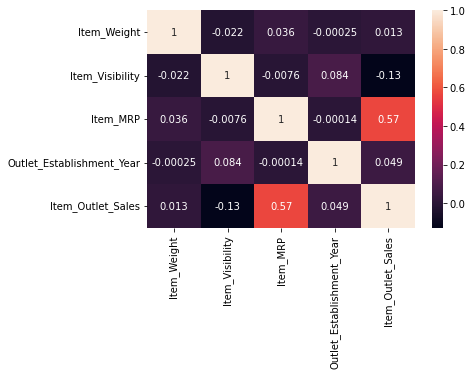

In [56]:
sns.heatmap(df.corr(),annot=True)

# Conversion of Categorical variables to Numerical (One Hot Encoding)

In [57]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.022028,0.035751,-0.000247,0.013261
Item_Visibility,-0.022028,1.000000,-0.007550,0.084481,-0.128453
Item_MRP,0.035751,-0.007550,1.000000,-0.000141,0.567574
Outlet_Establishment_Year,-0.000247,0.084481,-0.000141,1.000000,0.049135
Item_Outlet_Sales,0.013261,-0.128453,0.567574,0.049135,1.000000


In [58]:
#Importing required library
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#New variable for outlet
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
df['Item_Type'] = le.fit_transform(df['Item_Type'])

## Transforming Categorical Variables
#var_mod = ['Item_Fat_Content','Outlet_Location_Type','Item_Category','Outlet_Size','Outlet_Type','Outlet','Item_Type',]

#le = LabelEncoder()
#for i in var_mod:
    #df[i] = le.fit_transform(df[i])

In [59]:
df = pd.get_dummies(df, columns = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Category','Outlet_Type'])

In [60]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Item_Category_Drinks,Item_Category_Food,Item_Category_Non-Consumeable,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,4,249.8092,OUT049,14,3735.1380,9,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,4,443.4228,3,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,14,2097.2700,9,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
3,FDX07,19.20,0.017834,6,182.0950,OUT010,15,732.3800,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0
4,NCD19,8.93,0.009780,9,53.8614,OUT013,26,994.7052,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0


In [61]:
## Drop the unwanted column 
df.drop(['Outlet_Identifier','Item_Identifier'],axis=1,inplace=True)

<AxesSubplot:>

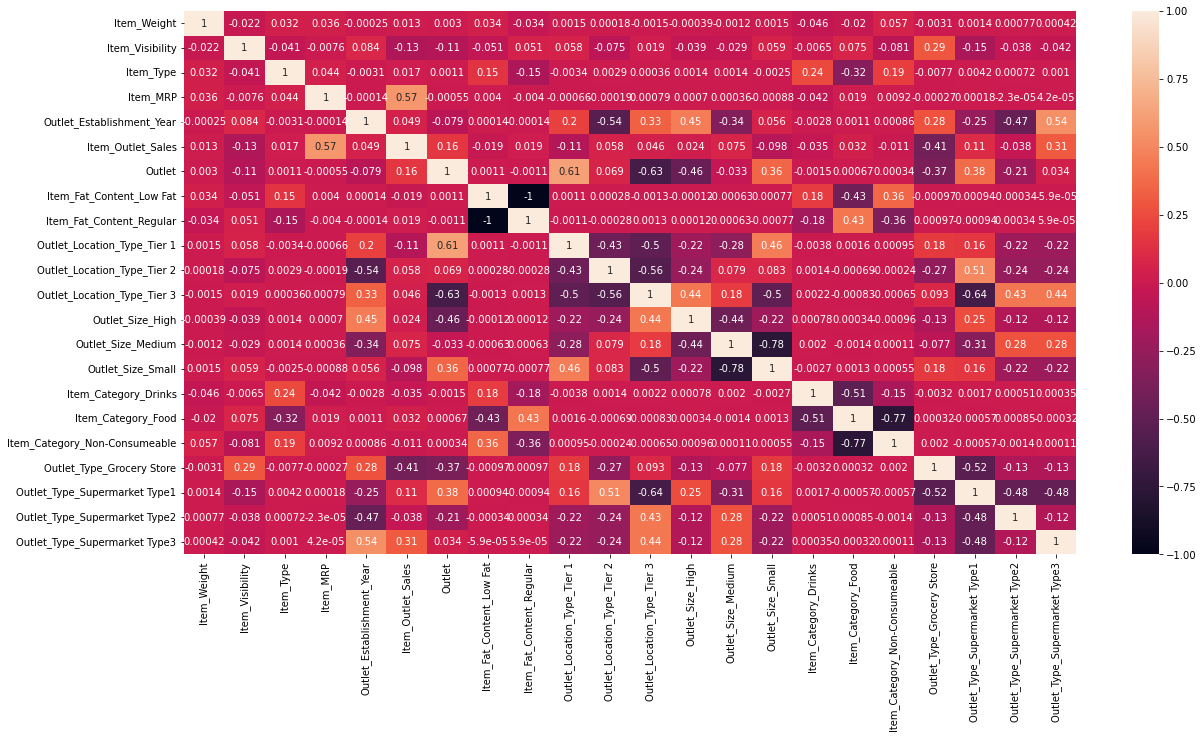

In [203]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

## Check The Target Variable

In [62]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

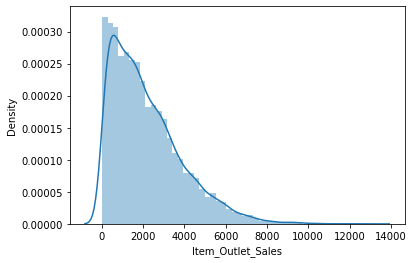

In [63]:
sns.distplot(df['Item_Outlet_Sales'])

* The data is not normally distributed the data is left skewed so we can do square root on target variable 

In [64]:
df['sqrt_Item_Outlet_Sales']=np.sqrt(df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='sqrt_Item_Outlet_Sales', ylabel='Density'>

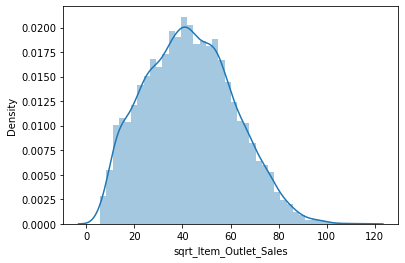

In [65]:
sns.distplot(df['sqrt_Item_Outlet_Sales'])

* Now target Variable is noramally distributed 

In [66]:
## Drop Item_outlet_sales
df.drop('Item_Outlet_Sales',axis=1,inplace=True)

In [67]:
df.shape

(14204, 22)

In [68]:
df2=df.copy(deep=True)

# Split Train and Test Data

In [69]:
df_test=df2[df2['sqrt_Item_Outlet_Sales'].isnull()]
df_test.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Item_Category_Drinks,Item_Category_Food,Item_Category_Non-Consumeable,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,sqrt_Item_Outlet_Sales
8523,20.750,0.007565,13,107.8622,14,9,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,NaN
8524,8.300,0.038428,4,87.3198,6,2,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,NaN
8525,14.600,0.099575,11,241.7538,15,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,NaN
8526,7.315,0.015388,13,155.0340,6,2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,NaN
8527,13.600,0.118599,4,234.2300,28,5,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,NaN


In [70]:
df_test.shape

(5681, 22)

In [71]:
df_train=df2[~df2['sqrt_Item_Outlet_Sales'].isnull()]
df_train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Item_Category_Drinks,Item_Category_Food,Item_Category_Non-Consumeable,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,sqrt_Item_Outlet_Sales
0,9.30,0.016047,4,249.8092,14,9,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,61.115775
1,5.92,0.019278,14,48.2692,4,3,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,21.057607
2,17.50,0.016760,10,141.6180,14,9,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,45.795961
3,19.20,0.017834,6,182.0950,15,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,27.062520
4,8.93,0.009780,9,53.8614,26,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,31.538947


In [72]:
y_train=df['sqrt_Item_Outlet_Sales']
y_train.head()

0    61.115775
1    21.057607
2    45.795961
3    27.062520
4    31.538947
Name: sqrt_Item_Outlet_Sales, dtype: float64

In [75]:
df_train.shape

(8523, 22)

## Scaling The Data

In [81]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
mms=MinMaxScaler()
sc=StandardScaler()


In [82]:
X_train=df_train.drop('sqrt_Item_Outlet_Sales',axis=1)
X_train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Item_Category_Drinks,Item_Category_Food,Item_Category_Non-Consumeable,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,4,249.8092,14,9,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
1,5.92,0.019278,14,48.2692,4,3,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
2,17.50,0.016760,10,141.6180,14,9,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
3,19.20,0.017834,6,182.0950,15,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0
4,8.93,0.009780,9,53.8614,26,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0


In [83]:
y_train=df_train['sqrt_Item_Outlet_Sales']
y_train.head()

0    61.115775
1    21.057607
2    45.795961
3    27.062520
4    31.538947
Name: sqrt_Item_Outlet_Sales, dtype: float64

In [84]:
X_test=df_test.drop('sqrt_Item_Outlet_Sales',axis=1)
X_test.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Item_Category_Drinks,Item_Category_Food,Item_Category_Non-Consumeable,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8523,20.750,0.007565,13,107.8622,14,9,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
8524,8.300,0.038428,4,87.3198,6,2,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
8525,14.600,0.099575,11,241.7538,15,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0
8526,7.315,0.015388,13,155.0340,6,2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
8527,13.600,0.118599,4,234.2300,28,5,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1


In [85]:
print('X_test Shape :',X_test.shape)
print('X_train Shape :',X_train.shape)


X_test Shape : (5681, 21)
X_train Shape : (8523, 21)


In [266]:
#sc=StandardScaler()
#scaled=sc.fit_transform(X_train)
#scaled_t=sc.transform(X_test)
#scaled__train_data=pd.DataFrame(scaled,columns=X_train.columns)
#scaled__test_data=pd.DataFrame(scaled_t,columns=X_test.columns)
#scaled__train_data.head()

In [267]:
#scaled__test_data.head()

In [86]:

scaled=mms.fit_transform(X_train)
scaled_t=mms.transform(X_test)
scaled__train_data=pd.DataFrame(scaled,columns=X_train.columns)
scaled__test_data=pd.DataFrame(scaled_t,columns=X_test.columns)
scaled__train_data.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Item_Category_Drinks,Item_Category_Food,Item_Category_Non-Consumeable,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.038399,0.266667,0.927507,0.416667,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.081274,0.048346,0.933333,0.072068,0.000000,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.770765,0.040593,0.666667,0.468288,0.416667,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.871986,0.043901,0.400000,0.640093,0.458333,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.260494,0.019104,0.600000,0.095805,0.916667,0.111111,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [87]:
scaled__test_data.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Item_Category_Drinks,Item_Category_Food,Item_Category_Non-Consumeable,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.964275,0.012284,0.866667,0.325012,0.416667,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.222983,0.107301,0.266667,0.237819,0.083333,0.222222,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.598095,0.295552,0.733333,0.893316,0.458333,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.164335,0.036370,0.866667,0.525233,0.083333,0.222222,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.538553,0.354122,0.266667,0.861381,1.000000,0.555556,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [92]:
scaled__train_data.shape

(8523, 21)

# Model Building

### 1. Linear Regression Model

In [270]:
## Importing the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,r2_score

In [271]:
X_train,X_test,y_train,y_test = train_test_split(scaled__train_data,y_train,test_size=0.3,random_state=100)

In [272]:
lr.fit(X_train,y_train)

LinearRegression()

In [273]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5966, 21) (5966,)
(2557, 21) (2557,)


In [274]:
tr_pred=lr.predict(X_train)
ts_pred=lr.predict(X_test)

In [275]:
Mean_Squared_Error_Train = mean_squared_error(y_train,tr_pred)
Root_Mean_Squared_Error_Train = np.sqrt(Mean_Squared_Error_Train)
Mean_Squared_Error_Test = mean_squared_error(y_test, ts_pred)
Root_Mean_Squared_Error_Test = np.sqrt(Mean_Squared_Error_Test)
R_Squared_Test=r2_score(y_test,ts_pred)
R_Squared_Train=r2_score(y_train,tr_pred)


print('Mean_Squared_Error_Train:',Mean_Squared_Error_Train)
print('Mean_Squared_Error_Test:',Mean_Squared_Error_Test)
print('Root_Mean_Squared_Error_Train:',Root_Mean_Squared_Error_Train)
print('Root_Mean_Squared_Error_Test:',Root_Mean_Squared_Error_Test)
print('R_Squared_Train :',R_Squared_Train*100)
print('R_Squared_Test:',R_Squared_Test*100)

Mean_Squared_Error_Train: 115.58631056901582
Mean_Squared_Error_Test: 116.6954512890601
Root_Mean_Squared_Error_Train: 10.751107411286329
Root_Mean_Squared_Error_Test: 10.802566884266911
R_Squared_Train : 66.10099029501329
R_Squared_Test: 64.40399448559673


In [ ]:
# File Submission

In [276]:
X_train=df_train.drop('sqrt_Item_Outlet_Sales',axis=1)
X_train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Item_Category_Drinks,Item_Category_Food,Item_Category_Non-Consumeable,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,4,249.8092,14,9,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
1,5.92,0.019278,14,48.2692,4,3,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
2,17.50,0.016760,10,141.6180,14,9,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
3,19.20,0.017834,6,182.0950,15,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0
4,8.93,0.009780,9,53.8614,26,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0


In [277]:
y_train=df_train['sqrt_Item_Outlet_Sales']
y_train.head()

0    61.115775
1    21.057607
2    45.795961
3    27.062520
4    31.538947
Name: sqrt_Item_Outlet_Sales, dtype: float64

In [278]:
X_test=df_test.drop(['sqrt_Item_Outlet_Sales'],axis=1)
X_test.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Item_Category_Drinks,Item_Category_Food,Item_Category_Non-Consumeable,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8523,20.750,0.007565,13,107.8622,14,9,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
8524,8.300,0.038428,4,87.3198,6,2,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
8525,14.600,0.099575,11,241.7538,15,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0
8526,7.315,0.015388,13,155.0340,6,2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
8527,13.600,0.118599,4,234.2300,28,5,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1


In [279]:
lr.fit(scaled__train_data,y_train)

LinearRegression()

In [280]:
y_pred=lr.predict(scaled__test_data)

In [290]:
y_pred=pd.DataFrame(y_pred)
y_pred.head()

,0
0,40.493413
1,37.490690
2,33.733898
3,48.378097
4,74.046244
5,41.421051
6,27.046830
7,48.359483
8,37.121161
9,53.609061


In [282]:
df = pd.read_csv('sample_submission_8RXa3c6.csv')
df.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [283]:
df.shape

(5681, 3)

In [284]:
df = pd.DataFrame(df.values[:,:-1])
df.values


array([['FDW58', 'OUT049'],
       ['FDW14', 'OUT017'],
       ['NCN55', 'OUT010'],
       ...,
       ['NCO17', 'OUT045'],
       ['FDJ26', 'OUT017'],
       ['FDU37', 'OUT045']], dtype=object)

In [285]:
df_sub=pd.concat([df,y_pred],axis=1)


In [286]:
df_sub.reset_index(drop=True,inplace=True)

In [287]:
df_sub.columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']
df_sub

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,40.493413
1,FDW14,OUT017,37.490690
2,NCN55,OUT010,33.733898
3,FDQ58,OUT017,48.378097
4,FDY38,OUT027,74.046244
...,...,...,...
5676,FDB58,OUT046,45.542051
5677,FDD47,OUT018,46.860851
5678,NCO17,OUT045,40.433604
5679,FDJ26,OUT017,58.483136


In [289]:
df_sub.to_csv('Linearregression2.csv',index=False)

# Random forest Model

In [313]:
from sklearn.ensemble import RandomForestRegressor
rfe=RandomForestRegressor()
from sklearn.model_selection import GridSearchCV

In [412]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.3,random_state=100)

In [292]:
parameters={'n_estimators':[10,25,30,50,100,200],
           'max_depth':[2,3,5,10,20],
          'min_samples_leaf':[5,10,20,50,100,200] }

In [293]:
grid_search=GridSearchCV(estimator=rfe,param_grid=parameters,n_jobs=-1,cv=5,verbose=1,scoring='neg_mean_squared_error')

In [294]:
grid_search.fit(scaled__train_data,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [295]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 50}
RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=50)


In [319]:
rfe_regressor=RandomForestRegressor(n_estimators=50,max_depth=5,min_samples_leaf=5)

In [320]:
rfe_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=50)

In [321]:
tr_pred=rfe_regressor.predict(X_train)
ts_pred=rfe_regressor.predict(X_test)

In [322]:
Mean_Squared_Error_Train = mean_squared_error(y_train,tr_pred)
Root_Mean_Squared_Error_Train = np.sqrt(Mean_Squared_Error_Train)
Mean_Squared_Error_Test = mean_squared_error(y_test, ts_pred)
Root_Mean_Squared_Error_Test = np.sqrt(Mean_Squared_Error_Test)
R_Squared_Test=r2_score(y_test,ts_pred)
R_Squared_Train=r2_score(y_train,tr_pred)


print('Mean_Squared_Error_Train:',Mean_Squared_Error_Train)
print('Mean_Squared_Error_Test:',Mean_Squared_Error_Test)
print('Root_Mean_Squared_Error_Train:',Root_Mean_Squared_Error_Train)
print('Root_Mean_Squared_Error_Test:',Root_Mean_Squared_Error_Test)
print('R_Squared_Train :',R_Squared_Train*100)
print('R_Squared_Test:',R_Squared_Test*100)

Mean_Squared_Error_Train: 108.17761531996338
Mean_Squared_Error_Test: 104.46346481426467
Root_Mean_Squared_Error_Train: 10.400846855903772
Root_Mean_Squared_Error_Test: 10.220736999564398
R_Squared_Train : 68.65607658205968
R_Squared_Test: 68.45242084673859


In [408]:
X_train=df_train.drop('sqrt_Item_Outlet_Sales',axis=1)
X_train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Item_Category_Drinks,Item_Category_Food,Item_Category_Non-Consumeable,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,4,249.8092,14,9,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
1,5.92,0.019278,14,48.2692,4,3,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
2,17.50,0.016760,10,141.6180,14,9,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
3,19.20,0.017834,6,182.0950,15,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0
4,8.93,0.009780,9,53.8614,26,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0


In [409]:
y_train=df_train['sqrt_Item_Outlet_Sales']
y_train.head()

0    61.115775
1    21.057607
2    45.795961
3    27.062520
4    31.538947
Name: sqrt_Item_Outlet_Sales, dtype: float64

In [410]:
X_test=df_test.drop(['sqrt_Item_Outlet_Sales'],axis=1)
X_test.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Item_Category_Drinks,Item_Category_Food,Item_Category_Non-Consumeable,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8523,20.750,0.007565,13,107.8622,14,9,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
8524,8.300,0.038428,4,87.3198,6,2,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
8525,14.600,0.099575,11,241.7538,15,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0
8526,7.315,0.015388,13,155.0340,6,2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
8527,13.600,0.118599,4,234.2300,28,5,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1


In [420]:
rfe_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=50,
                      random_state=100)

In [337]:
y_pred=lr.predict(X_test)

In [338]:
y_pred=pd.DataFrame(y_pred)
y_pred.head()

,0
0,4014.917578
1,3334.195454
2,9167.637869
3,5980.890493
4,8694.513458


In [339]:
df = pd.read_csv('sample_submission_8RXa3c6.csv')
df.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [340]:
df.shape

(5681, 3)

In [344]:
df = pd.DataFrame(df.values[:,:-1])
df.values


array([['FDW58', 'OUT049'],
       ['FDW14', 'OUT017'],
       ['NCN55', 'OUT010'],
       ...,
       ['NCO17', 'OUT045'],
       ['FDJ26', 'OUT017'],
       ['FDU37', 'OUT045']], dtype=object)

In [345]:
df_sub=pd.concat([df,y_pred],axis=1)


In [346]:
df_sub.reset_index(drop=True,inplace=True)

In [347]:
df_sub.columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']
df_sub

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,4014.917578
1,FDW14,OUT017,3334.195454
2,NCN55,OUT010,9167.637869
3,FDQ58,OUT017,5980.890493
4,FDY38,OUT027,8694.513458
...,...,...,...
5676,FDB58,OUT046,5282.394326
5677,FDD47,OUT018,6569.083215
5678,NCO17,OUT045,4486.717738
5679,FDJ26,OUT017,8308.256140


In [348]:
df_sub.to_csv('Randomforest.csv',index=False)

## Recursive Feature Elimination.

In [421]:
feat_importance = pd.Series(rfe_regressor.feature_importances_, index=X_train.columns)
feat_importance

Item_Weight                      0.000773
Item_Visibility                  0.000821
Item_Type                        0.000381
Item_MRP                         0.502978
Outlet_Establishment_Year        0.038035
Outlet                           0.000142
Item_Fat_Content_Low Fat         0.000043
Item_Fat_Content_Regular         0.000022
Outlet_Location_Type_Tier 1      0.000010
Outlet_Location_Type_Tier 2      0.000050
Outlet_Location_Type_Tier 3      0.000008
Outlet_Size_High                 0.000000
Outlet_Size_Medium               0.000011
Outlet_Size_Small                0.000020
Item_Category_Drinks             0.000019
Item_Category_Food               0.000004
Item_Category_Non-Consumeable    0.000018
Outlet_Type_Grocery Store        0.418881
Outlet_Type_Supermarket Type1    0.000463
Outlet_Type_Supermarket Type2    0.000031
Outlet_Type_Supermarket Type3    0.037289
dtype: float64

In [422]:
impo_cols =feat_importance.nlargest(9)
impo_cols

Item_MRP                         0.502978
Outlet_Type_Grocery Store        0.418881
Outlet_Establishment_Year        0.038035
Outlet_Type_Supermarket Type3    0.037289
Item_Visibility                  0.000821
Item_Weight                      0.000773
Outlet_Type_Supermarket Type1    0.000463
Item_Type                        0.000381
Outlet                           0.000142
dtype: float64

In [423]:
impo_cols=['Item_MRP','Outlet_Type_Grocery Store','Outlet_Type_Supermarket Type3',
           'Outlet_Establishment_Year','Item_Weight','Item_Visibility',
           'Outlet_Type_Supermarket Type1','Item_Type','Outlet'
           ] 

In [424]:
X_train,X_test,y_train,y_test = train_test_split(X_train[impo_cols],y_train,test_size=0.3,random_state=100)

In [425]:
rfe_regressor=RandomForestRegressor(n_estimators=50,max_depth=5,min_samples_leaf=5,random_state=100)

In [426]:
rfe_regressor.fit(X_train[impo_cols],y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=50,
                      random_state=100)

In [427]:
tr_pred=rfe_regressor.predict(X_train[impo_cols])
ts_pred=rfe_regressor.predict(X_test[impo_cols])

In [428]:
Mean_Squared_Error_Train = mean_squared_error(y_train,tr_pred)
Root_Mean_Squared_Error_Train = np.sqrt(Mean_Squared_Error_Train)
Mean_Squared_Error_Test = mean_squared_error(y_test, ts_pred)
Root_Mean_Squared_Error_Test = np.sqrt(Mean_Squared_Error_Test)
R_Squared_Test=r2_score(y_test,ts_pred)
R_Squared_Train=r2_score(y_train,tr_pred)


print('Mean_Squared_Error_Train:',Mean_Squared_Error_Train)
print('Mean_Squared_Error_Test:',Mean_Squared_Error_Test)
print('Root_Mean_Squared_Error_Train:',Root_Mean_Squared_Error_Train)
print('Root_Mean_Squared_Error_Test:',Root_Mean_Squared_Error_Test)
print('R_Squared_Train :',R_Squared_Train*100)
print('R_Squared_Test:',R_Squared_Test*100)

Mean_Squared_Error_Train: 106.63925959910199
Mean_Squared_Error_Test: 109.86627190869493
Root_Mean_Squared_Error_Train: 10.326628665692496
Root_Mean_Squared_Error_Test: 10.481711306303705
R_Squared_Train : 68.72497029893445
R_Squared_Test: 66.48712201282297
